In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans


loading data

In [ ]:

data = pd.read_csv("data/advertising.csv")


exploring and ploting


First 5 Rows:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Check Null Values:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


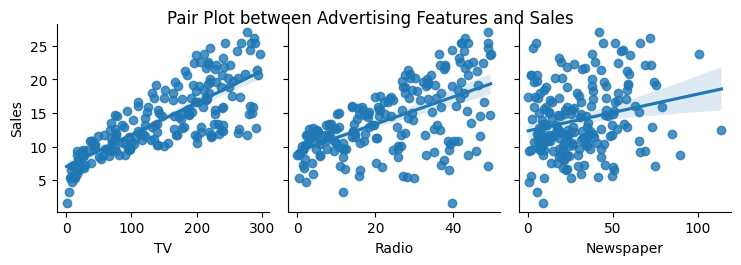

In [ ]:

print("\nFirst 5 Rows:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nCheck Null Values:")
print(data.isnull().sum())


X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']


sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='reg')
plt.suptitle("Pair Plot between Advertising Features and Sales", y=1.02)
plt.show()


splittind data

In [6]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


fitting model

In [7]:

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)


In [8]:

poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)


In [9]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svr = SVR(kernel='rbf')
svr.fit(X_train_s, y_train_s)
y_pred_svr = svr.predict(X_test_s)


evaluation metric

In [10]:

def eval_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

lin_mae, lin_mse, lin_rmse = eval_metrics(y_test, y_pred_lin)
poly_mae, poly_mse, poly_rmse = eval_metrics(y_test, y_pred_poly)
svr_mae, svr_mse, svr_rmse = eval_metrics(y_test_s, y_pred_svr)

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'SVR (RBF)'],
    'MAE': [lin_mae, poly_mae, svr_mae],
    'MSE': [lin_mse, poly_mse, svr_mse],
    'RMSE': [lin_rmse, poly_rmse, svr_rmse]
})

print("\nModel Evaluation Results:\n")
print(results)



Model Evaluation Results:

                   Model       MAE       MSE      RMSE
0      Linear Regression  1.460757  3.174097  1.781600
1  Polynomial Regression  0.526179  0.412910  0.642581
2              SVR (RBF)  1.137493  2.773951  1.665518


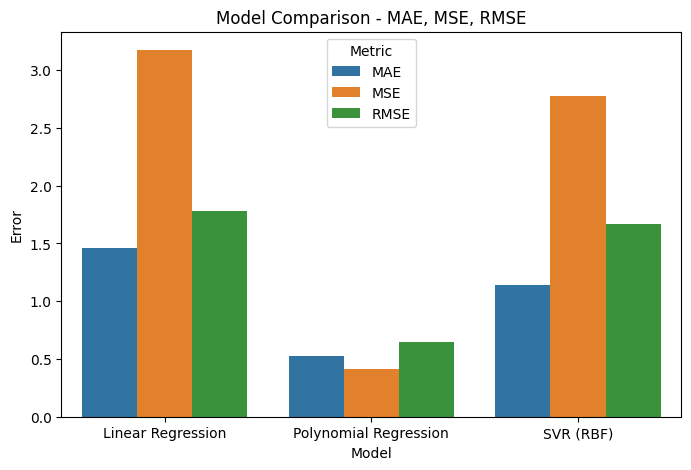

In [11]:

plt.figure(figsize=(8,5))
sns.barplot(data=results.melt(id_vars='Model', var_name='Metric', value_name='Error'),
            x='Model', y='Error', hue='Metric')
plt.title('Model Comparison - MAE, MSE, RMSE')
plt.show()


kmeans clustering

In [12]:

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

print("\nCluster Centers:")
print(kmeans.cluster_centers_)


c:\Users\mohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster Centers:
[[141.79655172  20.77931034  26.18103448]
 [ 45.20923077  23.42769231  31.06461538]
 [236.95714286  24.9974026   33.41688312]]


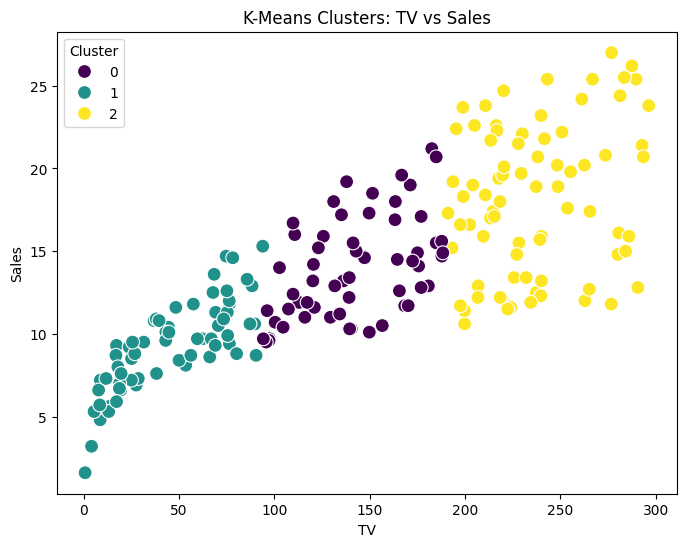

In [13]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='TV', y='Sales', hue='Cluster', palette='viridis', s=100)
plt.title("K-Means Clusters: TV vs Sales")
plt.show()
